In [4]:
# beer dataset
import pandas as pd
beer = pd.read_csv('data.txt',sep=' ')
beer

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


In [5]:
X = beer[["calories","sodium","alcohol","cost"]]

## K-means clustering

In [8]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3).fit(X)
km2 = KMeans(n_clusters=2).fit(X)

In [10]:
print(km.labels_)
print(km2.labels_)

[0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 2 0 0 2 1]
[1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0]


In [12]:
beer['cluster'] = km.labels_
beer['cluster2'] = km2.labels_
beer.sort_values('cluster')

,name,calories,sodium,alcohol,cost,cluster,cluster2
0,Budweiser,144,15,4.7,0.43,0,1
1,Schlitz,151,19,4.9,0.43,0,1
2,Lowenbrau,157,15,0.9,0.48,0,1
3,Kronenbourg,170,7,5.2,0.73,0,1
4,Heineken,152,11,5.0,0.77,0,1
5,Old_Milwaukee,145,23,4.6,0.28,0,1
6,Augsberger,175,24,5.5,0.40,0,1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0,1
17,Heilemans_Old_Style,144,24,4.9,0.43,0,1
16,Hamms,139,19,4.4,0.43,0,1


In [14]:
from pandas.plotting import scatter_matrix
%matplotlib inline
cluster_center = km.cluster_centers_
cluster_center2 = km2.cluster_centers_

In [15]:
beer.groupby('cluster').mean()

,calories,sodium,alcohol,cost,cluster2
cluster,,,,,
0,150.00,17.0,4.521429,0.520714,1
1,102.75,10.0,4.075000,0.440000,0
2,70.00,10.5,2.600000,0.420000,0


In [16]:
beer.groupby('cluster2').mean()

,calories,sodium,alcohol,cost,cluster
cluster2,,,,,
0,91.833333,10.166667,3.583333,0.433333,1.333333
1,150.000000,17.000000,4.521429,0.520714,0.000000


In [20]:
# 用各个簇的特征平均值来表示中心的所有特征值
centers = beer.groupby('cluster').mean().reset_index()
centers

,cluster,calories,sodium,alcohol,cost,cluster2
0,0,150.00,17.0,4.521429,0.520714,1
1,1,102.75,10.0,4.075000,0.440000,0
2,2,70.00,10.5,2.600000,0.420000,0


In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

In [25]:
import numpy as np
colors = np.array(['red','green','blue','yellow'])

Text(0, 0.5, 'Alcohol')

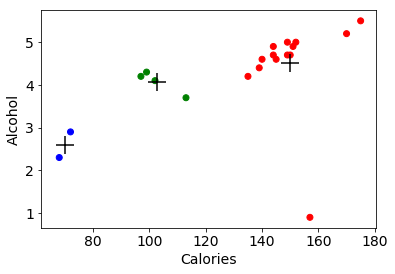

In [26]:
plt.scatter(beer['calories'],beer['alcohol'],c=colors[beer['cluster']])
plt.scatter(centers.calories,centers.alcohol,linewidths=3,marker='+',s=300,c='black')
plt.xlabel('Calories')
plt.ylabel('Alcohol')

1.frame:pandas dataframe对象

2.alpha: 图像透明度，一般取(0,1] 

3.figsize:以英寸为单位的图像大小，一般以元组 (width, height) 形式设置 

4.ax:可选一般为none 

5.diagonal:必须且只能在{‘hist’, ‘kde’}中选择1个，’hist’表示直方图(Histogram plot),’kde’表示核密度估计(Kernel Density 
Estimation)；该参数是scatter_matrix函数的关键参数 

6.marke:Matplotlib可用的标记类型，如’.’，’,’，’o’等 

7.density_kwds(other plotting keyword arguments，可选)，与kde相关的字典参数 

8.hist_kwds与hist相关的字典参数 

9.range_padding(float, 可选)，图像在x轴、y轴原点附近的留白(padding)，该值越大，留白距离越大，图像远离坐标原点

10.kwds与scatter_matrix函数本身相关的字典参数 

11.c:颜色

Text(0.5, 0.98, 'With 3 centroids initialized')

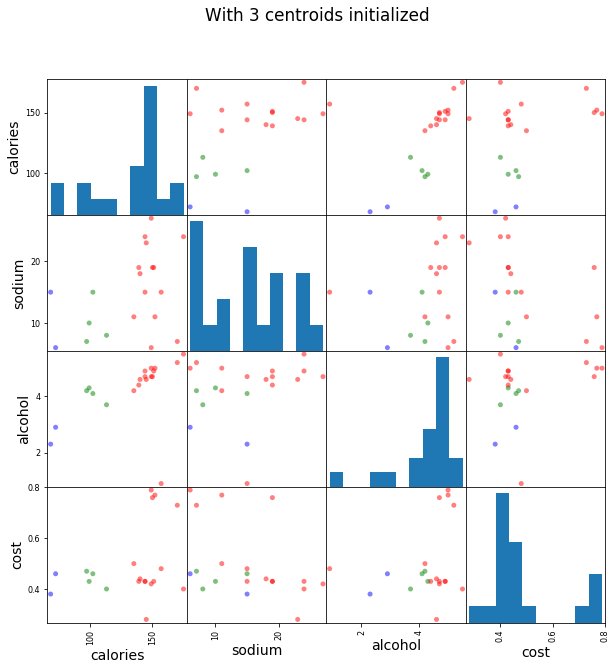

In [82]:
scatter_matrix(beer[["calories","sodium","alcohol","cost"]],s=100,c=colors[beer['cluster']],figsize=(10,10))
plt.suptitle("With 3 centroids initialized")

Text(0.5, 0.98, 'With 2 centroids initialized')

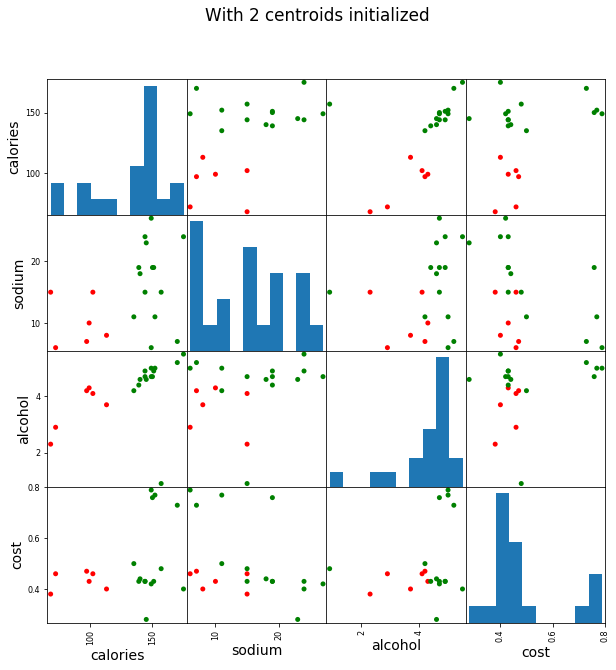

In [80]:
scatter_matrix(beer[["calories","sodium","alcohol","cost"]],s=100,alpha=1,c=colors[beer['cluster2']],figsize=(10,10))
plt.suptitle('With 2 centroids initialized')

### Scaled data

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

c:\developenvironment\anaconda\envs\tensorflow\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\developenvironment\anaconda\envs\tensorflow\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 0.38791334,  0.00779468,  0.43380786, -0.45682969],
       [ 0.6250656 ,  0.63136906,  0.62241997, -0.45682969],
       [ 0.82833896,  0.00779468, -3.14982226, -0.10269815],
       [ 1.26876459, -1.23935408,  0.90533814,  1.66795955],
       [ 0.65894449, -0.6157797 ,  0.71672602,  1.95126478],
       [ 0.42179223,  1.25494344,  0.3395018 , -1.5192243 ],
       [ 1.43815906,  1.41083704,  1.1882563 , -0.66930861],
       [ 0.55730781,  1.87851782,  0.43380786, -0.52765599],
       [-1.1366369 , -0.7716733 ,  0.05658363, -0.45682969],
       [-0.66233238, -1.08346049, -0.5092527 , -0.66930861],
       [ 0.25239776,  0.47547547,  0.3395018 , -0.38600338],
       [-1.03500022,  0.00779468, -0.13202848, -0.24435076],
       [ 0.08300329, -0.6157797 , -0.03772242,  0.03895447],
       [ 0.59118671,  0.63136906,  0.43380786,  1.88043848],
       [ 0.55730781, -1.39524768,  0.71672602,  2.0929174 ],
       [-2.18688263,  0.00779468, -1.82953748, -0.81096123],
       [ 0.21851887,  0.

In [34]:
km = KMeans(n_clusters=3).fit(X_scaled)

In [35]:
beer["scaled_cluster"] = km.labels_
beer.sort_values("scaled_cluster")

,name,calories,sodium,alcohol,cost,cluster,cluster2,scaled_cluster
9,Budweiser_Light,113,8,3.7,0.40,1,0,0
15,Pabst_Extra_Light,68,15,2.3,0.38,2,0,0
12,Michelob_Light,135,11,4.2,0.50,0,1,0
11,Coors_Light,102,15,4.1,0.46,1,0,0
18,Olympia_Goled_Light,72,6,2.9,0.46,2,0,0
8,Miller_Lite,99,10,4.3,0.43,1,0,0
19,Schlitz_Light,97,7,4.2,0.47,1,0,0
2,Lowenbrau,157,15,0.9,0.48,0,1,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0,1,1
5,Old_Milwaukee,145,23,4.6,0.28,0,1,1


What are the "characteristics" of each cluster?

In [36]:
beer.groupby("scaled_cluster").mean()

,calories,sodium,alcohol,cost,cluster,cluster2
scaled_cluster,,,,,,
0,105.375,10.875,3.3250,0.4475,1.0,0.25
1,148.375,21.125,4.7875,0.4075,0.0,1.00
2,155.250,10.750,4.9750,0.7625,0.0,1.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AEEEAEFC18>,
      dtype=object)

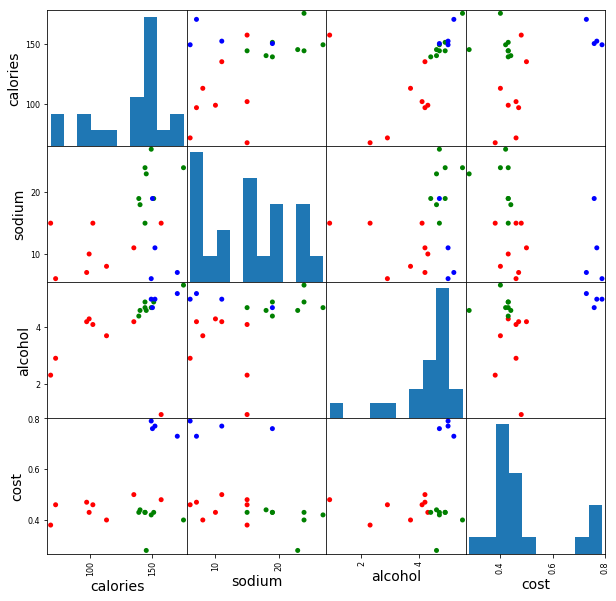

In [38]:
scatter_matrix(X,s=100,c=colors[beer['scaled_cluster']],alpha=1,figsize=(10,10))

## 聚类评估：轮廓系数（Silhouette Coefficient ）

<img src="1.png" alt="FAO" width="490">

- 计算样本i到同簇其他样本的平均距离ai。ai 越小，说明样本i越应该被聚类到该簇。将ai 称为样本i的簇内不相似度。
- 计算样本i到其他某簇Cj 的所有样本的平均距离bij，称为样本i与簇Cj 的不相似度。定义为样本i的簇间不相似度：bi =min{bi1, bi2, ..., bik}


* si接近1，则说明样本i聚类合理
* si接近-1，则说明样本i更应该分类到另外的簇
* 若si 近似为0，则说明样本i在两个簇的边界上。

In [40]:
from sklearn import metrics
score_scaled = metrics.silhouette_score(X,beer.scaled_cluster)
score = metrics.silhouette_score(X,beer.cluster)
print(score_scaled,score)

0.1797806808940007 0.6731775046455796


怎么回事？标准化之后的数据，进行聚类，效果反而比未进行标准化的差？这说明一个问题：数据集的一些特征本身就是非常重要的，就需要把它放大，但是呢，由于我们的标准化使得它的特征不那么明显了，从而影响到了聚类效果。

In [41]:
scores = []
for k in range(2,20):
    labels = KMeans(n_clusters=k).fit(X).labels_
    score = metrics.silhouette_score(X,labels)
    scores.append(score)
    
scores

[0.6917656034079486,
 0.6731775046455796,
 0.5857040721127795,
 0.422548733517202,
 0.4559182167013377,
 0.43776116697963124,
 0.38946337473125997,
 0.3658612182712316,
 0.4081599013899603,
 0.32472080133848924,
 0.3459775237127248,
 0.31221439248428434,
 0.30707782144770296,
 0.31834561839139497,
 0.2849514001174898,
 0.23498077333071996,
 0.1588091017496281,
 0.08423051380151177]

Text(0, 0.5, 'Sihouette Score')

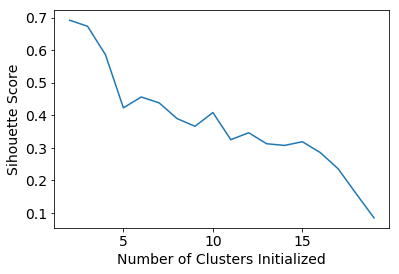

In [42]:
plt.plot(list(range(2,20)), scores)
plt.xlabel("Number of Clusters Initialized")
plt.ylabel("Sihouette Score")

可以发现，最好的簇的数量就是2。

##  DBSCAN clustering

In [44]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=10,min_samples=2).fit(X)

In [45]:
labels = db.labels_

In [46]:
beer['cluster_db'] = labels
beer.sort_values('cluster_db')

,name,calories,sodium,alcohol,cost,cluster,cluster2,scaled_cluster,cluster_db
9,Budweiser_Light,113,8,3.7,0.40,1,0,0,-1
3,Kronenbourg,170,7,5.2,0.73,0,1,2,-1
6,Augsberger,175,24,5.5,0.40,0,1,1,-1
17,Heilemans_Old_Style,144,24,4.9,0.43,0,1,1,0
16,Hamms,139,19,4.4,0.43,0,1,1,0
14,Kirin,149,6,5.0,0.79,0,1,2,0
13,Becks,150,19,4.7,0.76,0,1,2,0
12,Michelob_Light,135,11,4.2,0.50,0,1,0,0
10,Coors,140,18,4.6,0.44,0,1,1,0
0,Budweiser,144,15,4.7,0.43,0,1,1,0


In [47]:
beer.groupby('cluster_db').mean()

,calories,sodium,alcohol,cost,cluster,cluster2,scaled_cluster
cluster_db,,,,,,,
-1,152.666667,13.000000,4.800000,0.510000,0.333333,0.666667,1.000000
0,146.250000,17.250000,4.383333,0.513333,0.000000,1.000000,1.083333
1,99.333333,10.666667,4.200000,0.453333,1.000000,0.000000,0.000000
2,70.000000,10.500000,2.600000,0.420000,2.000000,0.000000,0.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AEEF497FD0>,
      dtype=object)

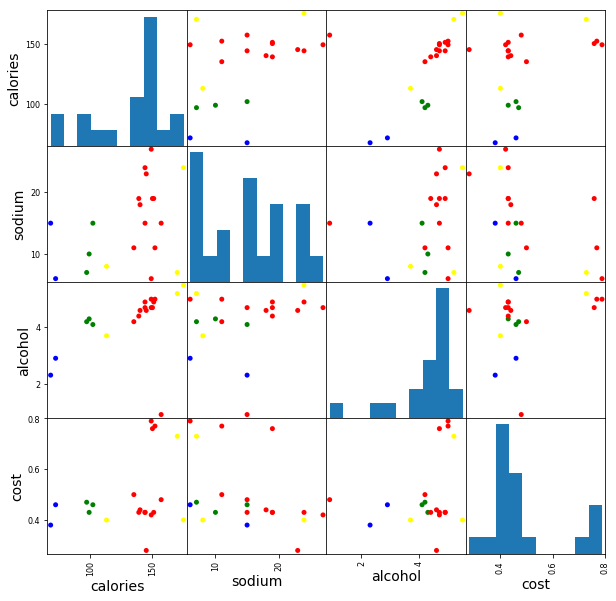

In [48]:
scatter_matrix(X,s=100,c=colors[beer['cluster_db']],alpha=1,figsize=(10,10))

In [70]:
scores = []
for r,k in [(10,2), (11,2), (12,2), (13,2), (14,2), (15,2), (16,2)]:
    labels = DBSCAN(eps=r,min_samples=k).fit(X).labels_
    score = metrics.silhouette_score(X,labels)
    scores.append(score)
scores

[0.49530955296776086,
 0.49530955296776086,
 0.49530955296776086,
 0.49530955296776086,
 0.5857040721127795,
 0.5857040721127795,
 0.5238781710613801]

Text(0, 0.5, 'Sihouette Score')

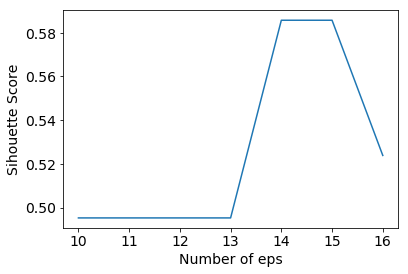

In [71]:
plt.plot(range(10,17),scores)
plt.xlabel('Number of eps')
plt.ylabel('Sihouette Score')

In [76]:
scores = []
for r,k in [(14,2), (14,3), (14,4), (14,5), (14,6)]:
    labels = DBSCAN(eps=r,min_samples=k).fit(X).labels_
    score = metrics.silhouette_score(X,labels)
    scores.append(score)
scores

[0.5857040721127795,
 0.47814308215444046,
 0.47814308215444046,
 0.4767963143919395,
 0.4767963143919395]

Text(0, 0.5, 'Sihouette Score')

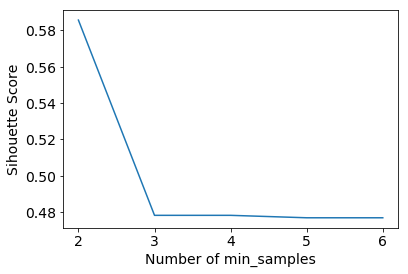

In [77]:
plt.plot(range(2,7),scores)
plt.xlabel('Number of min_samples')
plt.ylabel('Sihouette Score')